# Using deep features to train an image classifier

In [1]:
import turicreate

# Load some data

In [2]:
image_train = turicreate.SFrame('/home/kunalsirpor/Downloads/ML/_UfOzO0jEeiAgQrXx6bp4g_fd80e000ed2311e8a0546b27d475e197_image_train_data/image_train_data')
image_test = turicreate.SFrame('/home/kunalsirpor/Downloads/ML/_UcMSe0jEeiixgqCUDoEfA_fd7f3250ed2311e88507e367f09ac3a9_image_test_data/image_test_data')

# Explore this image data

/home/kunalsirpor/.venv/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))



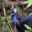
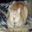
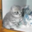
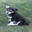
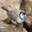
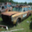
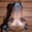
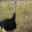
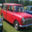
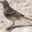
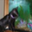
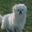
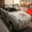
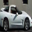
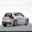
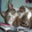
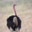
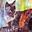
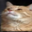
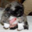
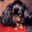
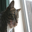
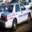
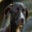
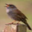
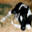
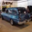
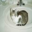
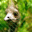
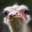
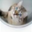
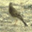
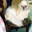
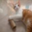
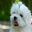
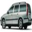
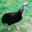
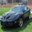
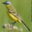
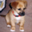
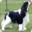
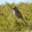
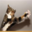
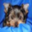
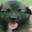
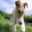
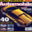
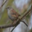
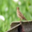
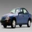
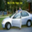
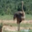
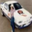
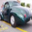
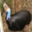
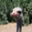
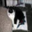
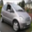
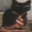
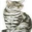
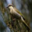
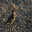
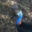
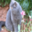
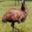
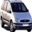
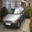
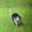
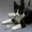
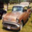
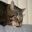
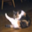
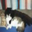
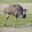
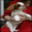
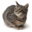
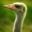
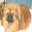
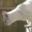
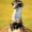
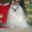
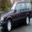
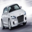
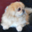
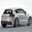
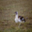
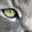
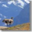
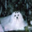
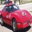
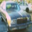
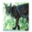
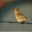
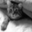
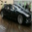
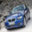
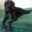
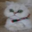
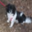
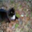

In [3]:
image_train['image'].explore()

# Train an image classifier on raw image pixels

In [4]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.052153  | 1.268155     | 0.334034          | 0.386139            |

| 1         | 9        | 1.095206  | 1.557897     | 0.408088          | 0.425743            |

| 2         | 10       | 1.095206  | 1.687940     | 0.411239          | 0.346535            |

| 3         | 15       | 1.020704  | 2.036251     | 0.447479          | 0.396040            |

| 4         | 16       | 1.020704  | 2.179669     | 0.452731          | 0.435644            |

| 9         | 26       | 0.767305  | 3.062753     | 0.526261          | 0.475248            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions using simple raw pixel model


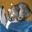
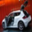
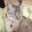

In [5]:
image_test[0:3]['image'].explore()

In [6]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [7]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluate the raw pixel model on the test data

In [8]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.48375,
 'auc': 0.726359750000001,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       dog       |  182  |
 |     dog      |       cat       |  226  |
 |     cat      |       cat       |  344  |
 |     bird     |    automobile   |  132  |
 |  automobile  |    automobile   |  635  |
 |     dog      |    automobile   |  102  |
 |     dog      |       dog       |  424  |
 |     cat      |       dog       |  297  |
 |     bird     |       cat       |  154  |
 |  automobile  |       bird      |  110  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.48119368502574683,
 'log_loss': 1.198399856577427,
 'precision

# Train image classifier using deep features

In [9]:
len(image_train)

2005

In [10]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [11]:
image_train

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 2005

Data:
+-----+----------------------+------------+-------------------------------+
|  id |        image         |   label    |         deep_features         |
+-----+----------------------+------------+-------------------------------+
|  24 | Height: 32 Width: 32 |    bird    | [0.24287176132202148, 1.09... |
|  33 | Height: 32 Width: 32 |    cat     | [0.5250879526138306, 0.0, ... |
|  36 | Height: 32 Width: 32 |    cat     | [0.5660159587860107, 0.0, ... |
|  70 | Height: 32 Width: 32 |    dog     | [1.129795789718628, 0.0, 0... |
|  90 | Height: 32 Width: 32 |    bird    | [1.7178692817687988, 0.0, ... |
|  97 | Height: 32 Width: 32 | automobile | [1.5781855583190918, 0.0, ... |
| 107 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.2206778526306... |
| 121 | Height: 32 Width: 32 |    bird    | [0.0, 0.23753464221954346,... |
| 136 | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 138 | Height: 32 Width: 32 |    bird    | [0.6589357256889343, 0.0, ... |
+-----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [73.0, 77.0, 58.0, 71.0, 6... |
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
| [169.0, 122.0, 65.0, 131.0... |
| [154.0, 179.0, 152.0, 159.... |
| [216.0, 195.0, 180.0, 201.... |
| [33.0, 44.0, 27.0, 29.0, 4... |
| [97.0, 51.0, 31.0, 104.0, ... |
| [93.0, 96.0, 88.0, 102.0, ... |
| [35.0, 59.0, 53.0, 36.0, 5... |
| [205.0, 193.0, 195.0, 200.... |
+-------------------------------+
[2005 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

# Given the deep features, train a logistic classifier

In [12]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.394289     | 0.759454          | 0.732673            |

| 1         | 6        | 0.250000  | 0.856106     | 0.772584          | 0.732673            |

| 2         | 12       | 1.046505  | 1.661906     | 0.789916          | 0.722772            |

| 3         | 13       | 1.046505  | 1.920550     | 0.776786          | 0.722772            |

| 4         | 14       | 1.046505  | 2.182997     | 0.830357          | 0.772277            |

| 9         | 21       | 1.000000  | 3.718062     | 0.921218          | 0.742574            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features classifier on the first few images


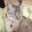
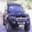
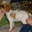
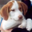
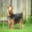
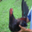

In [23]:
image_test[2:8]['image'].explore()

In [24]:
deep_features_model.predict(image_test[2:8])

dtype: str
Rows: 6
['cat', 'automobile', 'dog', 'dog', 'dog', 'bird']

# Quantitatively evaluate deep features classifier on test data

In [15]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.7895,
 'auc': 0.9393507499999985,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       dog       |   60  |
 |     dog      |       cat       |  233  |
 |     bird     |       bird      |  771  |
 |  automobile  |       bird      |   15  |
 |  automobile  |       cat       |   24  |
 |  automobile  |    automobile   |  952  |
 |     bird     |    automobile   |   14  |
 |  automobile  |       dog       |   9   |
 |     dog      |    automobile   |   10  |
 |     cat      |       dog       |  217  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7920762691368349,
 'log_loss': 0.6545061466879927,
 'precision

In [16]:
deep_features_model.predict(image_test[0:5])

dtype: str
Rows: 5
['cat', 'automobile', 'cat', 'automobile', 'dog']


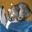
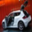
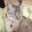
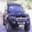

In [17]:
image_test[0:4]['image'].explore()


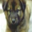
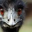
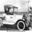
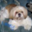
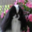
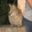
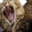
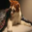
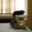
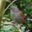

In [18]:
image_test[9:19]['image'].explore()

In [25]:
deep_features_model.predict(image_test[9:19])

dtype: str
Rows: 10
['cat', 'cat', 'automobile', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'bird']